## Imports

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

## 1. Tree-Based Methods

(a)Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [121]:
train_df = pd.read_csv('../data_HW6/aps_failure_training_set.csv', skiprows=20, 
                      na_values = 'na')

print(train_df.shape)
train_df.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [122]:
test_df = pd.read_csv('../data_HW6/aps_failure_test_set.csv', skiprows=20, 
                      na_values = 'na')

print(test_df.shape)
test_df.head()

(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


(b) Data Preparation  
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.  
i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [123]:
# Nedd to join datasets for imputation
df = pd.concat([train_df, test_df])

print(df.shape)
df.head()

(76000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [124]:
# There are many data imputation methods. For this homework,
# I am going to replace missing values with the mean of each column.

for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean(),inplace=True)
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [125]:
# Creating training and test sets
train = df[:60000]
test = df[60000:]

train = train.replace({'neg': 0, 'pos': 1})
test = test.replace({'neg': 0, 'pos': 1})

y_train = train['class']
y_train = y_train.astype('int')
x_train = train.drop(['class'], axis=1)

y_test = test['class']
y_test = y_test.astype('int')
x_test = test.drop(['class'], axis=1)

ii. For each of the 170 features, calculate the coefficient of variation CV = s/m,
where s is sample standard deviation and m is sample mean.

In [126]:
# Need to drop class column
feature_df = df.drop(['class'], axis=1)

cvs, stds, means = [], [], []
for i in feature_df.columns: 
    std = feature_df[i].std()
    mean = feature_df[i].mean()
    cv = (std/mean) *100
    stds.append(std)
    means.append(mean)
    cvs.append(cv)
cv_df = pd.DataFrame({'Feature': feature_df.columns, 
                      'CV': cvs, 'S': stds, 'M': means})
cv_df

,Feature,CV,S,M
0,aa_000,432.860784,2.647366e+05,6.115976e+04
1,ab_000,217.827259,1.580468e+00,7.255604e-01
2,ac_000,216.765331,7.726379e+08,3.564398e+08
3,ad_000,20672.149958,3.113845e+07,1.506300e+05
4,ae_000,2229.367043,1.501915e+02,6.736959e+00
...,...,...,...,...
165,ee_007,488.509773,1.697870e+06,3.475611e+05
166,ee_008,333.503665,4.665609e+05,1.398968e+05
167,ee_009,575.393311,4.847679e+04,8.424984e+03
168,ef_000,4791.954362,4.082618e+00,8.519734e-02


iii. Plot a correlation matrix for your features using pandas or any other tool.

<AxesSubplot:>

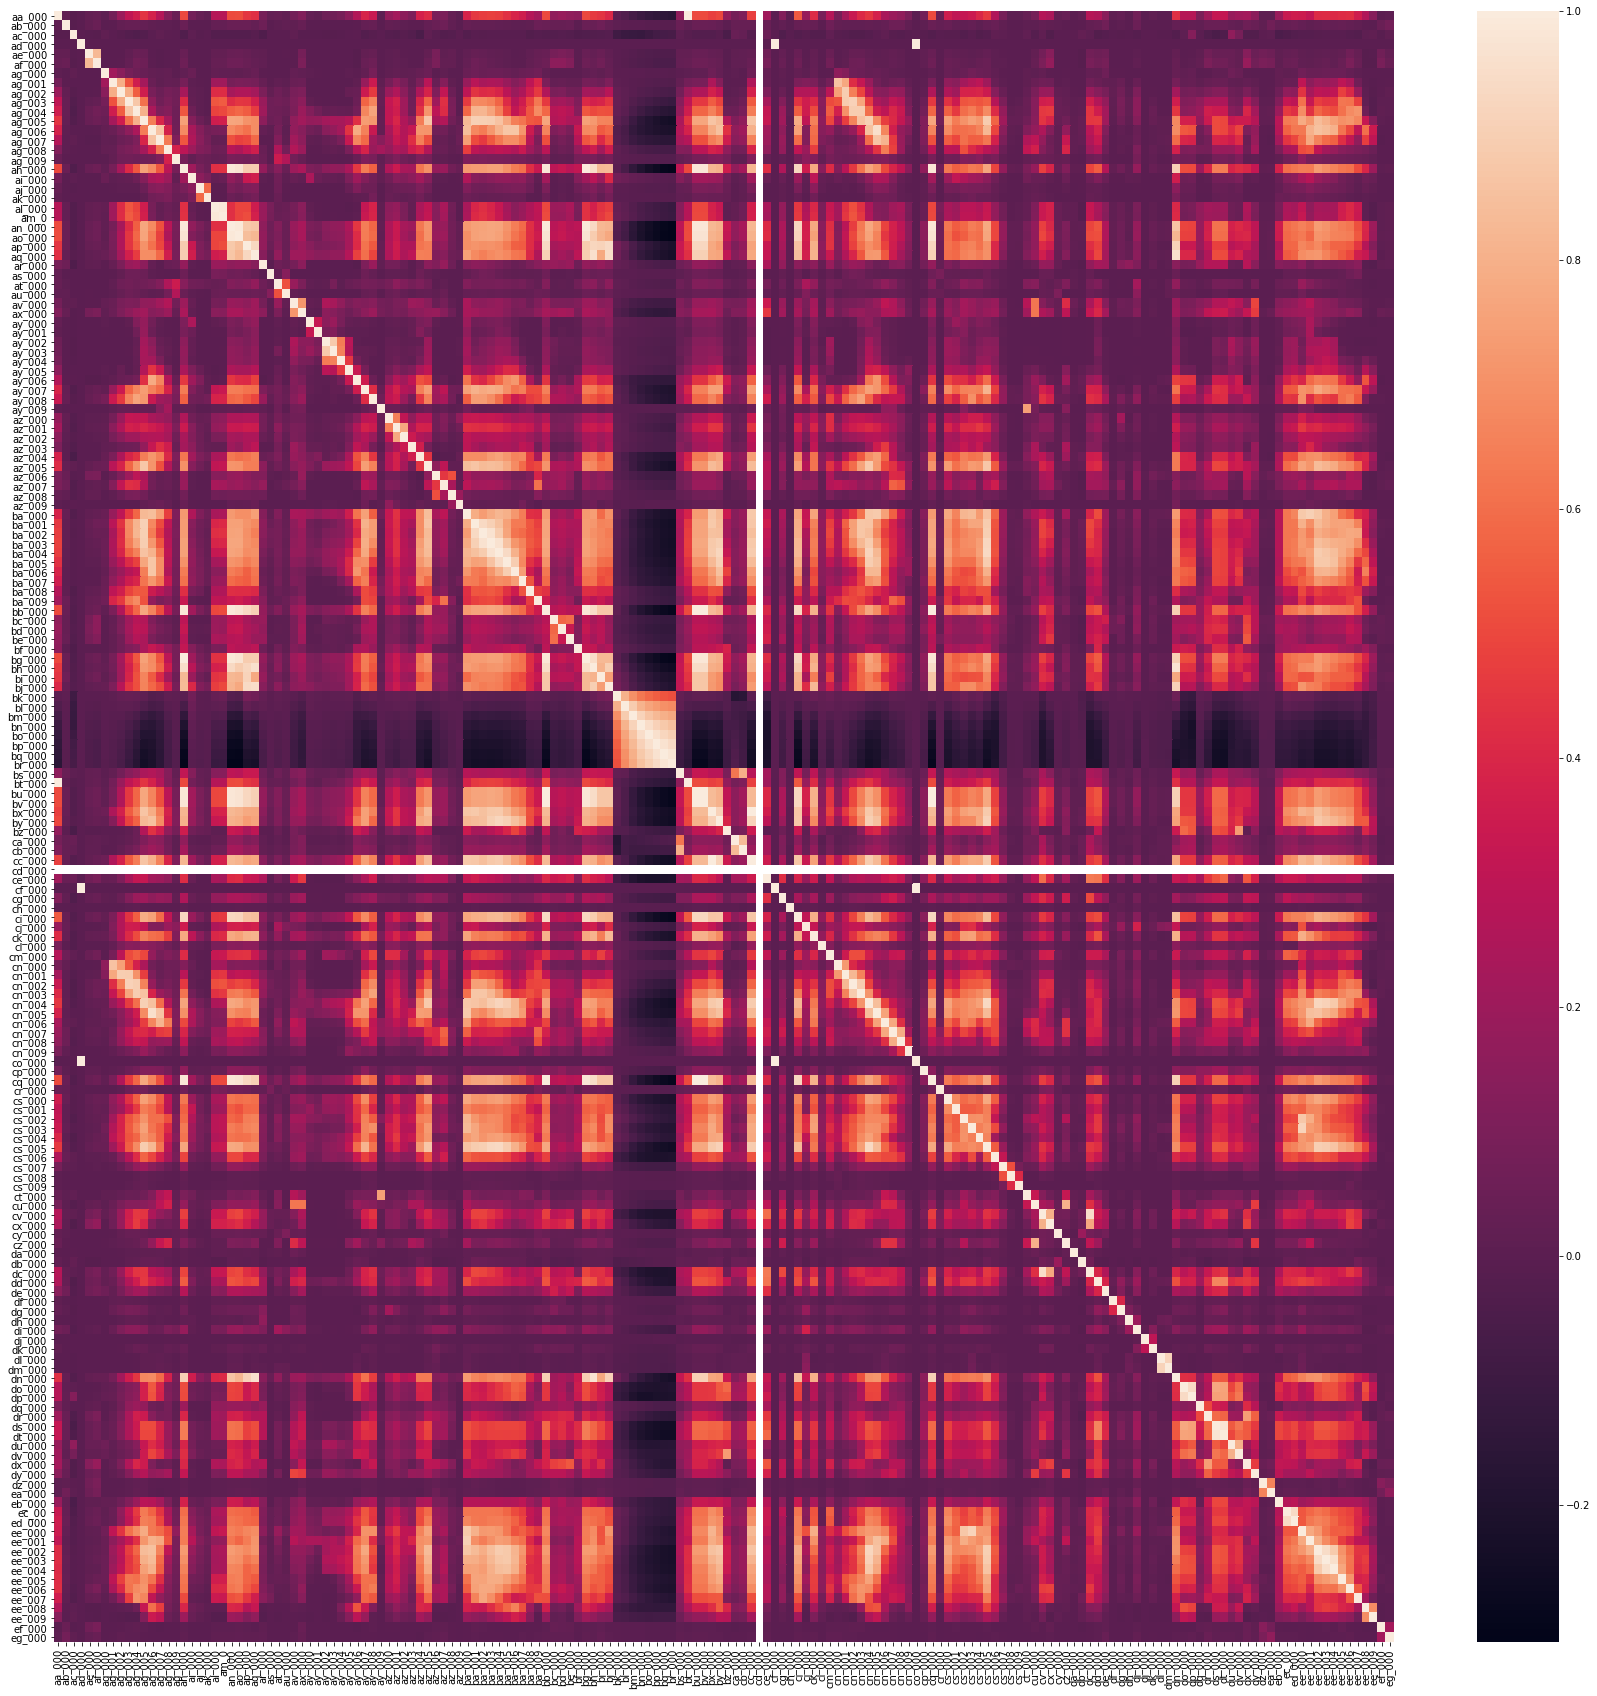

In [127]:
plt.figure(figsize=(30,30))
corr = feature_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

iv. Pick √170 features with highest CV, and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [128]:
170 ** (0.5)

13.038404810405298

In [129]:
highcv_df = cv_df.sort_values("CV", ascending=False)
highcv_df = highcv_df[:13]
highcv_df

,Feature,CV,S,M
91,cf_000,20727.027369,3.113845e+07,150231.156793
109,co_000,20687.612940,3.113845e+07,150517.375486
3,ad_000,20672.149958,3.113845e+07,150629.962105
122,cs_009,19252.261085,1.973109e+05,1024.871550
138,dj_000,12212.815278,3.891172e+03,31.861380
27,as_000,11388.275538,2.816704e+04,247.333635
136,dh_000,11265.245027,4.847230e+05,4302.818274
134,df_000,11136.966566,7.795510e+05,6999.670936
6,ag_000,9146.065360,1.833152e+04,200.430636
29,au_000,8608.563751,2.582009e+04,299.934980


In [130]:
highcv_features = []
for i in highcv_df['Feature']:
    highcv_features.append(i)
highcv_feature_df = feature_df[highcv_features]
highcv_feature_df

,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


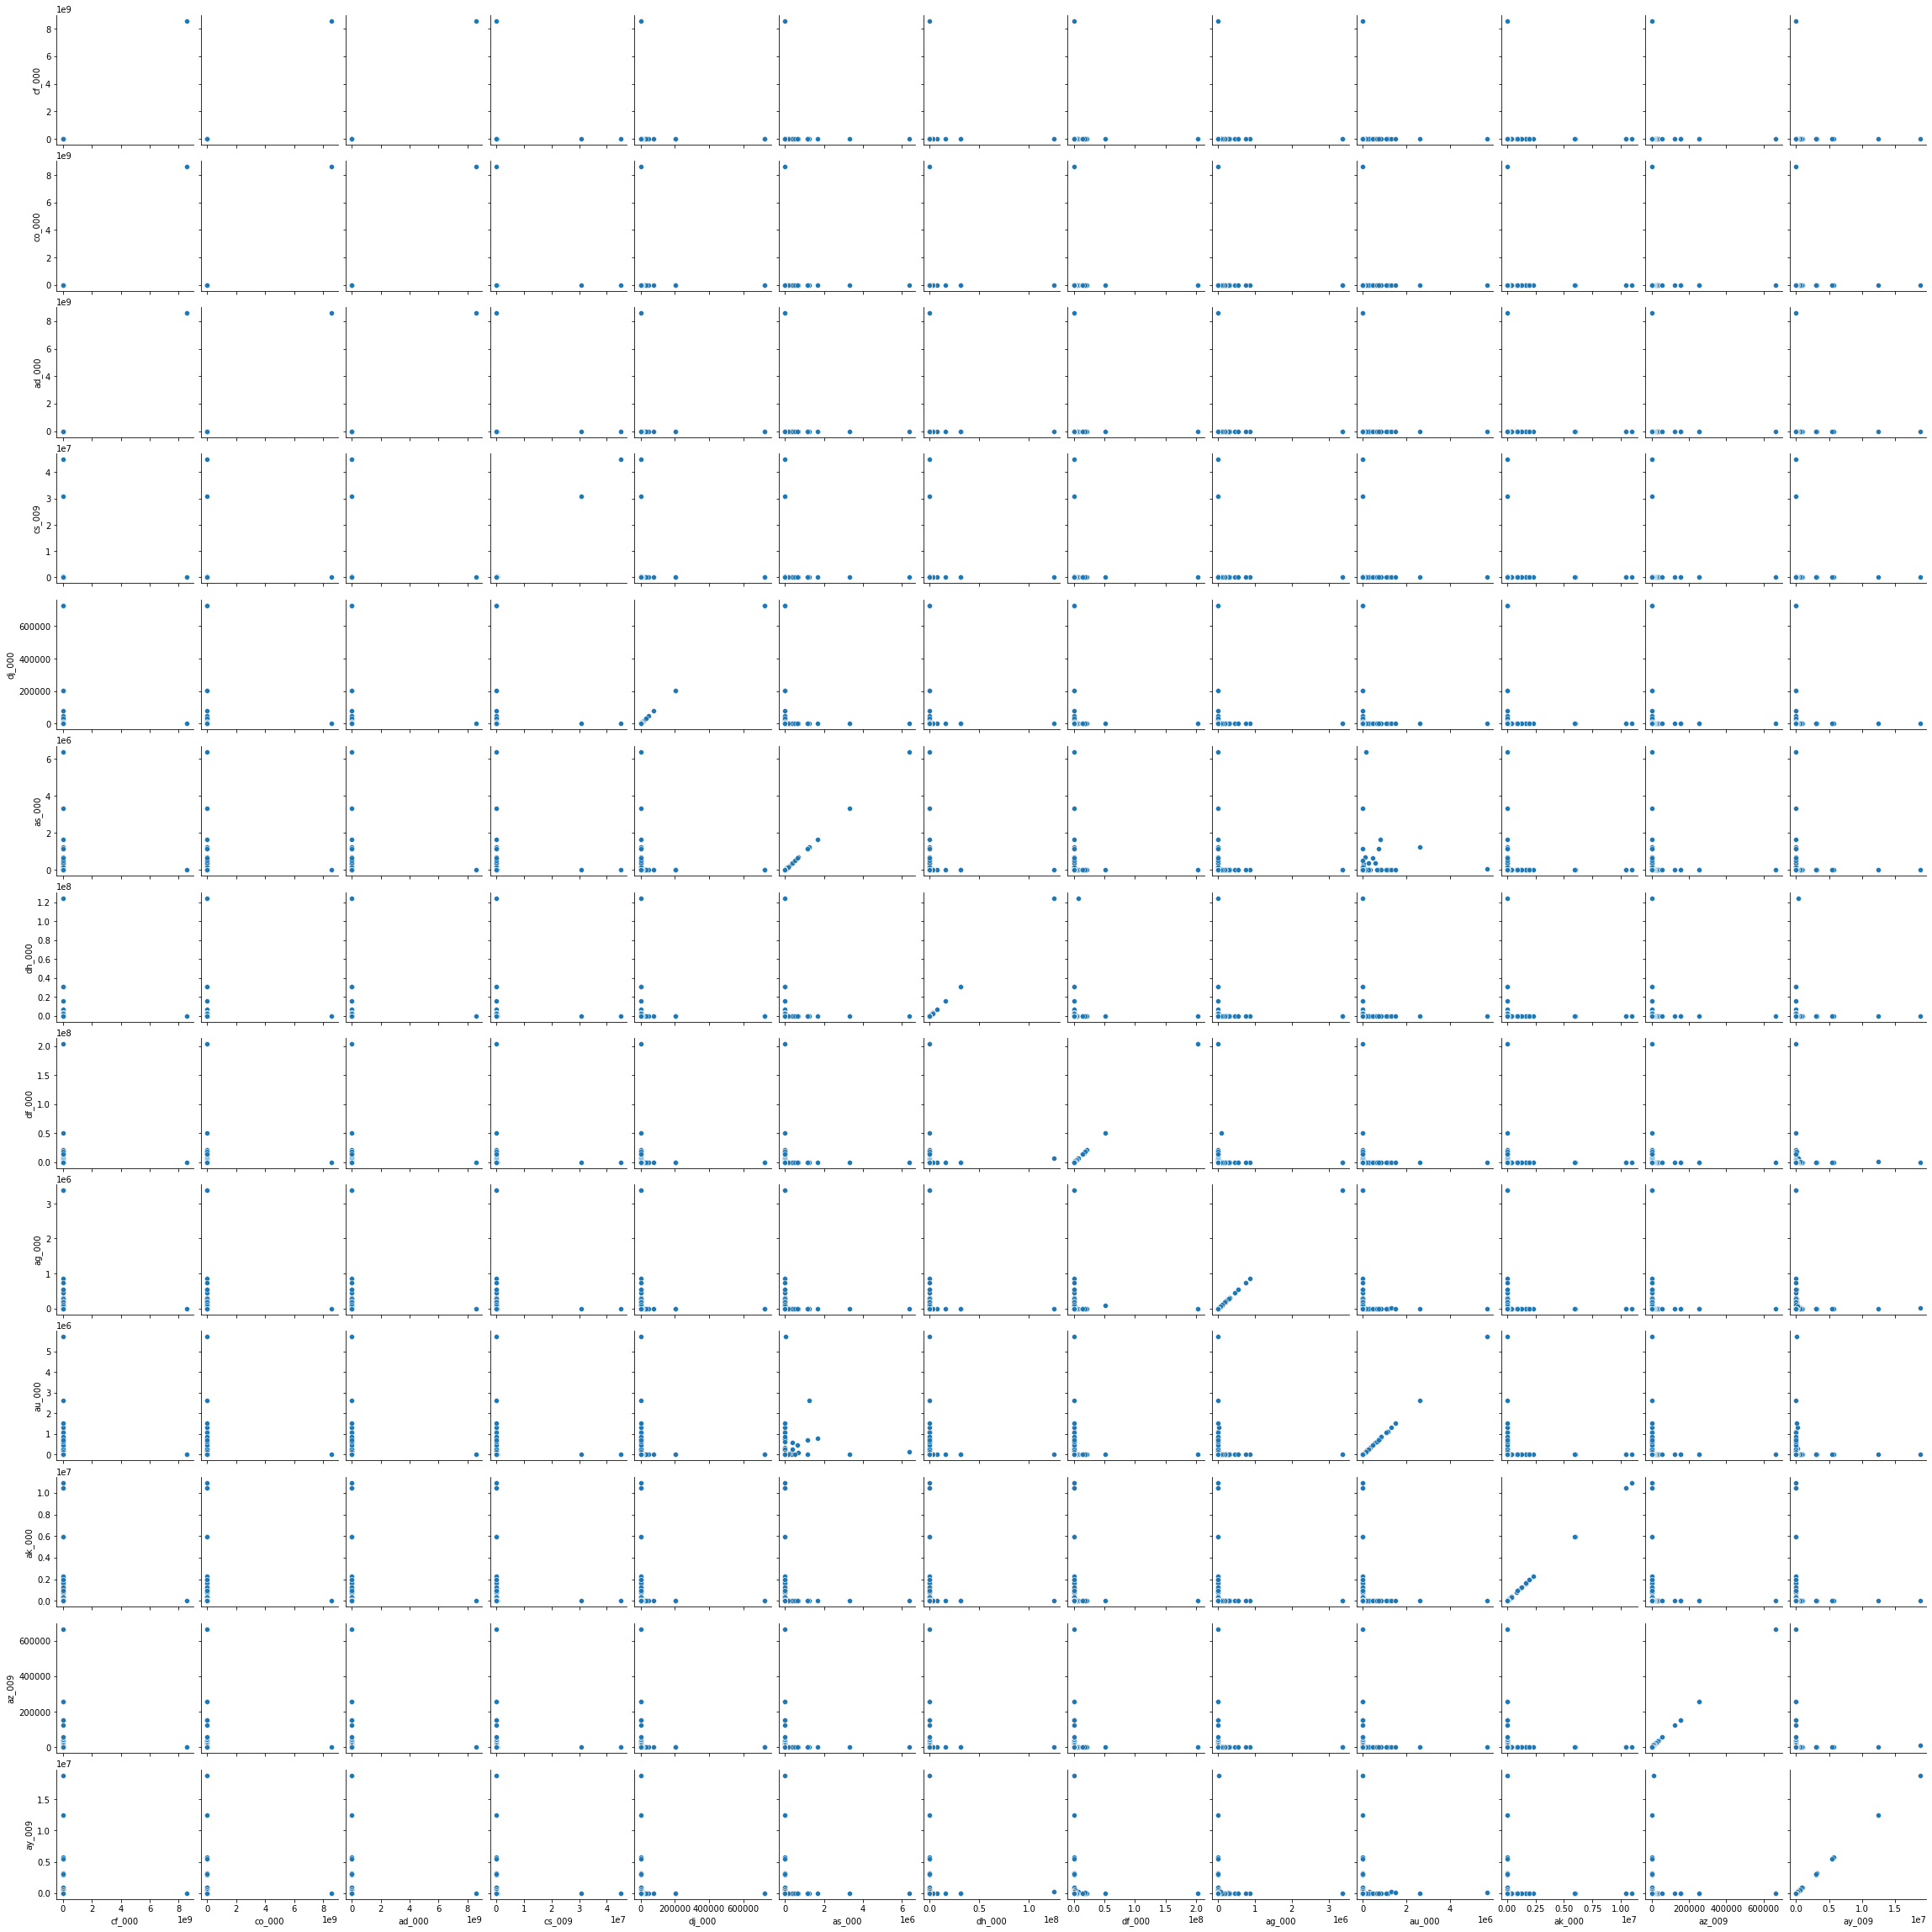

In [131]:
sns.pairplot(data=highcv_feature_df, diag_kind=None)

One interesting conclusion we can draw from the scatterplot is that one of the variables seems to always be zero when the other has a value. This might be slightly deceiving due to the magnitude of the axes, but it is an interesting finding.

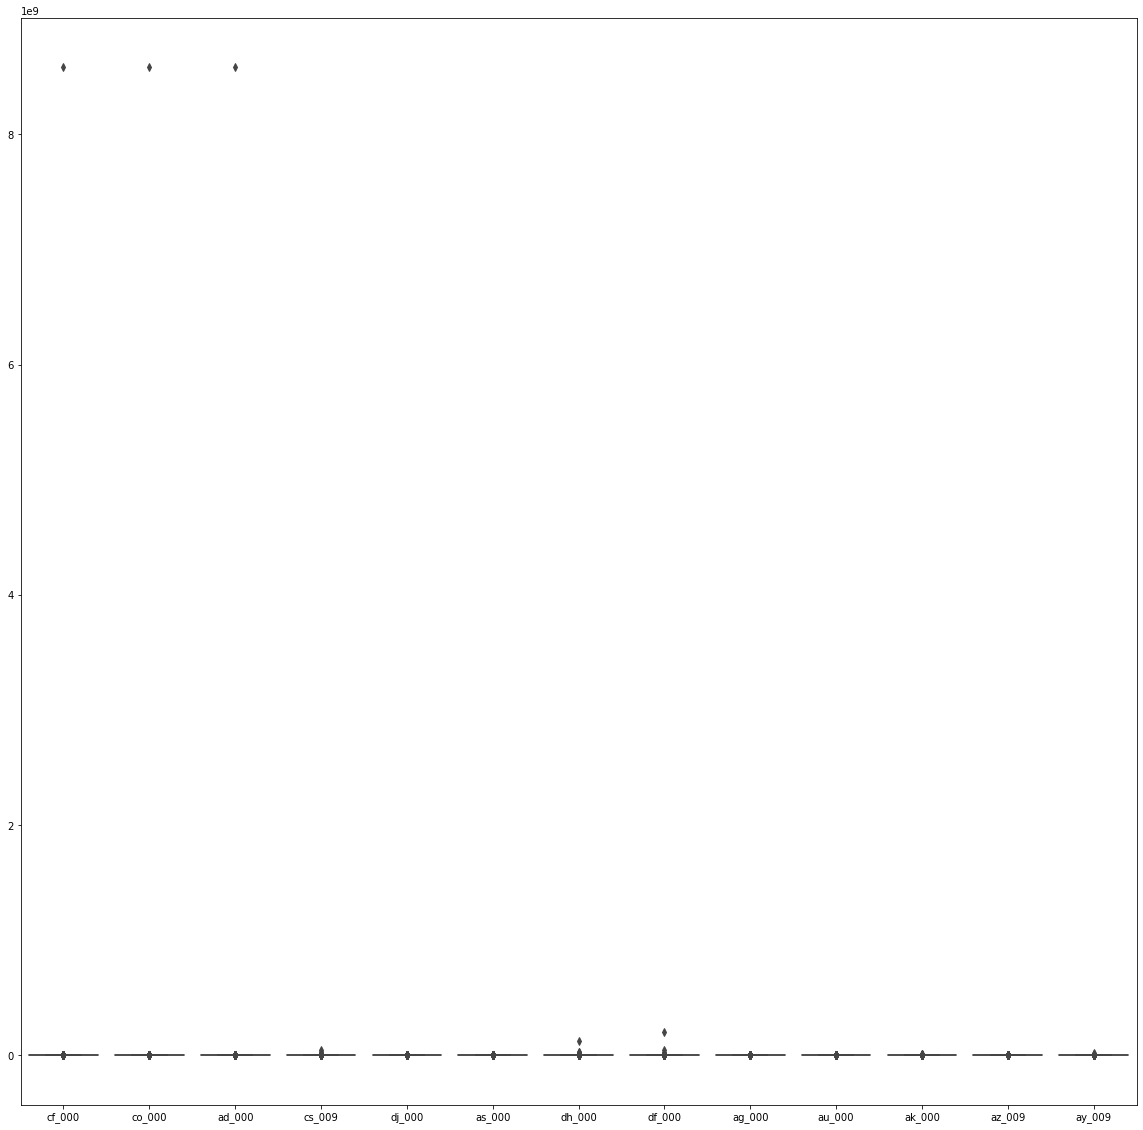

In [132]:
plt.figure(figsize=(20,20))
box = sns.boxplot(data=highcv_feature_df)

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [133]:
df['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

Yes, this data set is imbalanced. One of the classes (pos) is only ~1.8% of the total dataset, which indicates severe imbalance in the dataset.

(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

Training Set Confusion Matrix
[[59000     0]
 [    0  1000]]
Training False Positives: 0
Training False Negatives: 0
Training Misclassifications: 0
Training Error Rate: 0.0

Test Set Confusion Matrix
[[15608    17]
 [  102   273]]
Test False Positives: 17
Test False Negatives: 102
Test Misclassifications: 119
Test Error Rate: 0.00744

Out Of Bag Error Estimate: 0.00617


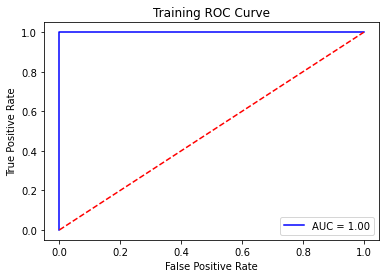

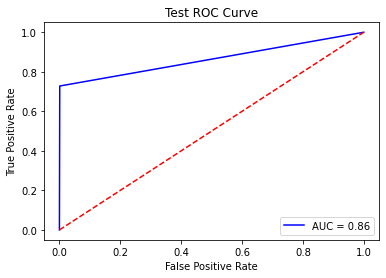

In [134]:
# Training Random Forest Model
clf = RandomForestClassifier(oob_score = True)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

# Confusion Matrix, Misclassifications, Error
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
train_tn, train_fp, train_fn, train_tp = cm_train.ravel()

cm_test = metrics.confusion_matrix(y_test, y_pred_test)
test_tn, test_fp, test_fn, test_tp = cm_test.ravel()

train_accuracy = accuracy_score(y_train, y_pred_train)
train_error = 1-train_accuracy
train_error = round(train_error, 5)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_error = 1-test_accuracy
test_error = round(test_error, 5)

print('Training Set Confusion Matrix')
print(cm_train)
print("Training False Positives:", train_fp)
print("Training False Negatives:", train_fn)
print("Training Misclassifications:", train_fp+train_fn)
print("Training Error Rate:", train_error)
print()

print('Test Set Confusion Matrix')
print(cm_test)
print("Test False Positives:", test_fp)
print("Test False Negatives:", test_fn)
print("Test Misclassifications:", test_fp+test_fn)
print("Test Error Rate:", test_error)
print()

# Out of Bag error estimate and 
oob_error = 1-clf.oob_score_
oob_error = round(oob_error, 5)
print("Out Of Bag Error Estimate:", oob_error)

# ROC and AUC
tpr_train, fpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(tpr_train, fpr_train)

tpr_test, fpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(tpr_test, fpr_test)


plt.title('Training ROC Curve')
plt.plot(tpr_train, fpr_train, 'b', label='AUC = %0.2f'% roc_auc_train) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Test ROC Curve')
plt.plot(tpr_test, fpr_test, 'b', label='AUC = %0.2f'% roc_auc_test) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(d)
Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

Training Set Confusion Matrix
[[59000     0]
 [    0 59000]]
Training False Positives: 0
Training False Negatives: 0
Training Misclassifications: 0
Training Error Rate: 0.0

Test Set Confusion Matrix
[[15549    76]
 [   64   311]]
Test False Positives: 76
Test False Negatives: 64
Test Misclassifications: 140
Test Error Rate: 0.00875

Out Of Bag Error Estimate: 0.00308


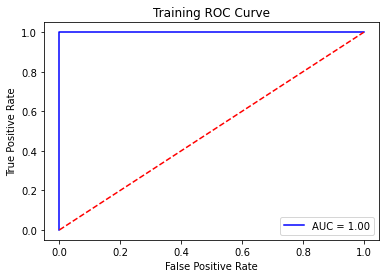

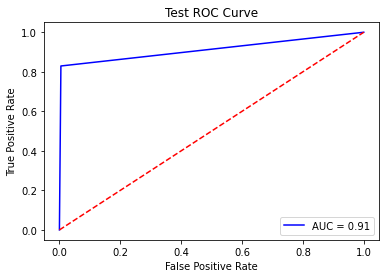

In [136]:
# Case Control Sampling with SMOTE
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

# Training Random Forest Model
clf = RandomForestClassifier(oob_score = True)
clf.fit(x_train_smote, y_train_smote)

y_pred_train = clf.predict(x_train_smote)
y_pred_test = clf.predict(x_test)

# Confusion Matrix, Misclassifications, Error
cm_train_smote = metrics.confusion_matrix(y_train_smote, y_pred_train)
train_tn_smote, train_fp_smote, train_fn_smote, train_tp_smote = cm_train_smote.ravel()

cm_test_smote = metrics.confusion_matrix(y_test, y_pred_test)
test_tn_smote, test_fp_smote, test_fn_smote, test_tp_smote = cm_test_smote.ravel()

train_accuracy_smote = accuracy_score(y_train_smote, y_pred_train)
train_error_smote = 1-train_accuracy_smote
train_error_smote = round(train_error_smote, 5)

test_accuracy_smote = accuracy_score(y_test, y_pred_test)
test_error_smote = 1-test_accuracy_smote
test_error_smote = round(test_error_smote, 5)

print('Training Set Confusion Matrix')
print(cm_train_smote)
print("Training False Positives:", train_fp_smote)
print("Training False Negatives:", train_fn_smote)
print("Training Misclassifications:", train_fp_smote+train_fn_smote)
print("Training Error Rate:", train_error_smote)
print()

print('Test Set Confusion Matrix')
print(cm_test_smote)
print("Test False Positives:", test_fp_smote)
print("Test False Negatives:", test_fn_smote)
print("Test Misclassifications:", test_fp_smote+test_fn_smote)
print("Test Error Rate:", test_error_smote)
print()

# Out of Bag error estimate and 
oob_error_smote = 1-clf.oob_score_
oob_error_smote = round(oob_error_smote, 5)
print("Out Of Bag Error Estimate:", oob_error_smote)

# ROC and AUC
tpr_train, fpr_train, thresholds_train = roc_curve(y_train_smote, y_pred_train)
roc_auc_train = auc(tpr_train, fpr_train)

tpr_test, fpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(tpr_test, fpr_test)


plt.title('Training ROC Curve')
plt.plot(tpr_train, fpr_train, 'b', label='AUC = %0.2f'% roc_auc_train) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Test ROC Curve')
plt.plot(tpr_test, fpr_test, 'b', label='AUC = %0.2f'% roc_auc_test) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [137]:
measures = ['Training Error', 'Test Error', 'OOB Error Estimate']
imbalance_measures = [train_error, test_error, oob_error]
smote_measures = [train_error_smote, test_error_smote, oob_error_smote]
rf_df = pd.DataFrame({'Measure': measures, 
                      'RF with class imbalance': imbalance_measures, 
                      'RF with SMOTE': smote_measures})
rf_df

,Measure,RF with class imbalance,RF with SMOTE
0,Training Error,0.00000,0.00000
1,Test Error,0.00744,0.00875
2,OOB Error Estimate,0.00617,0.00308


e)
XGBoost and Model Trees
> In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can
be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node. Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because
the number of variables is large in this problem, one can use
L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS
data set without compensation for class imbalance. Use one of 5 fold, 10 fold,
and leave-one-out cross validation methods to estimate the error of your trained
model and compare it with the test error. Report the Confusion Matrix, ROC,
and AUC for training and test sets.

In [138]:
xgb = XGBClassifier()
alpha_values = [.0001,.001,.01,.1,1,10,100,1000,10000]
params = {"reg_alpha": alpha_values}
grid = GridSearchCV(xgb, param_grid=params, cv=10)
grid.fit(x_train, y_train)
print(grid.best_params_['reg_alpha'])

1


Training Set Confusion Matrix
[[58962    38]
 [  232   768]]
Training False Positives: 38
Training False Negatives: 232
Training Misclassifications: 270
Training Error Rate: 0.0045

Test Set Confusion Matrix
[[15608    17]
 [  113   262]]
Test False Positives: 17
Test False Negatives: 113
Test Misclassifications: 130
Test Error Rate: 0.00813

Out Of Bag Error Estimate: 0.00308


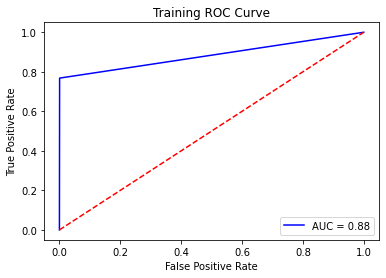

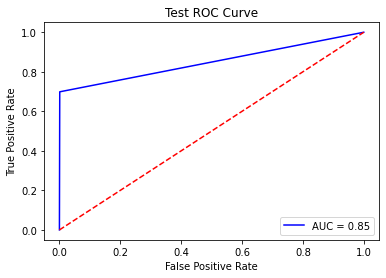

In [139]:
# Training XGBoost Model
xgb = XGBClassifier(reg_alpha=grid.best_params_['reg_alpha'])
xgb.fit(x_train, y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Confusion Matrix, Misclassifications, Error
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
train_tn, train_fp, train_fn, train_tp = cm_train.ravel()

cm_test = metrics.confusion_matrix(y_test, y_pred_test)
test_tn, test_fp, test_fn, test_tp = cm_test.ravel()

train_accuracy = accuracy_score(y_train, y_pred_train)
train_error = 1-train_accuracy
train_error = round(train_error, 5)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_error = 1-test_accuracy
test_error = round(test_error, 5)

print('Training Set Confusion Matrix')
print(cm_train)
print("Training False Positives:", train_fp)
print("Training False Negatives:", train_fn)
print("Training Misclassifications:", train_fp+train_fn)
print("Training Error Rate:", train_error)
print()

print('Test Set Confusion Matrix')
print(cm_test)
print("Test False Positives:", test_fp)
print("Test False Negatives:", test_fn)
print("Test Misclassifications:", test_fp+test_fn)
print("Test Error Rate:", test_error)
print()

# Out of Bag error estimate and 
oob_error = 1-clf.oob_score_
oob_error = round(oob_error, 5)
print("Out Of Bag Error Estimate:", oob_error)

# ROC and AUC
tpr_train, fpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(tpr_train, fpr_train)

tpr_test, fpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(tpr_test, fpr_test)


plt.title('Training ROC Curve')
plt.plot(tpr_train, fpr_train, 'b', label='AUC = %0.2f'% roc_auc_train) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Test ROC Curve')
plt.plot(tpr_test, fpr_test, 'b', label='AUC = %0.2f'% roc_auc_test) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [147]:
# Case Control Sampling with SMOTE
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

xgb = XGBClassifier()

pipe = Pipeline(steps=[("smote", sm), ("xgb", xgb)])
params = {"xgb__reg_alpha": alpha_values}
grid = GridSearchCV(pipe, param_grid=params, cv=10)
grid.fit(x_train_smote, y_train_smote)

print(grid.best_params_['xgb__reg_alpha'])

0.0001


Training Set Confusion Matrix
[[59000     0]
 [   16 58984]]
Training False Positives: 0
Training False Negatives: 16
Training Misclassifications: 16
Training Error Rate: 0.00014

Test Set Confusion Matrix
[[15549    76]
 [   64   311]]
Test False Positives: 76
Test False Negatives: 64
Test Misclassifications: 140
Test Error Rate: 0.00875

Out Of Bag Error Estimate: 0.00308


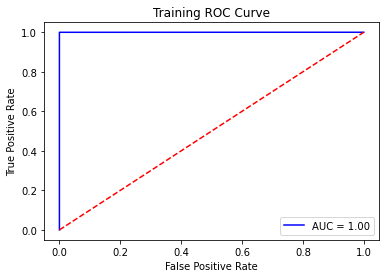

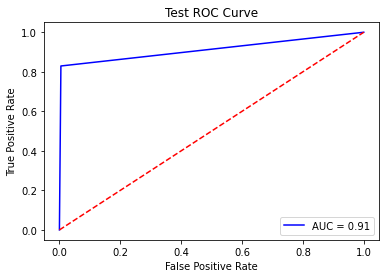

In [149]:
# Training XGBoost Model
xgb = XGBClassifier(reg_alpha=grid.best_params_['xgb__reg_alpha'])
xgb.fit(x_train_smote, y_train_smote)

y_pred_train = clf.predict(x_train_smote)
y_pred_test = clf.predict(x_test)

# Confusion Matrix, Misclassifications, Error
cm_train_smote = metrics.confusion_matrix(y_train_smote, y_pred_train)
train_tn_smote, train_fp_smote, train_fn_smote, train_tp_smote = cm_train_smote.ravel()

cm_test_smote = metrics.confusion_matrix(y_test, y_pred_test)
test_tn_smote, test_fp_smote, test_fn_smote, test_tp_smote = cm_test_smote.ravel()

train_accuracy_smote = accuracy_score(y_train_smote, y_pred_train)
train_error_smote = 1-train_accuracy_smote
train_error_smote = round(train_error_smote, 5)

test_accuracy_smote = accuracy_score(y_test, y_pred_test)
test_error_smote = 1-test_accuracy_smote
test_error_smote = round(test_error_smote, 5)

print('Training Set Confusion Matrix')
print(cm_train_smote)
print("Training False Positives:", train_fp_smote)
print("Training False Negatives:", train_fn_smote)
print("Training Misclassifications:", train_fp_smote+train_fn_smote)
print("Training Error Rate:", train_error_smote)
print()

print('Test Set Confusion Matrix')
print(cm_test_smote)
print("Test False Positives:", test_fp_smote)
print("Test False Negatives:", test_fn_smote)
print("Test Misclassifications:", test_fp_smote+test_fn_smote)
print("Test Error Rate:", test_error_smote)
print()

# Out of Bag error estimate and 
oob_error_smote = 1-clf.oob_score_
oob_error_smote = round(oob_error_smote, 5)
print("Out Of Bag Error Estimate:", oob_error_smote)

# ROC and AUC
tpr_train, fpr_train, thresholds_train = roc_curve(y_train_smote, y_pred_train)
roc_auc_train = auc(tpr_train, fpr_train)

tpr_test, fpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(tpr_test, fpr_test)


plt.title('Training ROC Curve')
plt.plot(tpr_train, fpr_train, 'b', label='AUC = %0.2f'% roc_auc_train) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Test ROC Curve')
plt.plot(tpr_test, fpr_test, 'b', label='AUC = %0.2f'% roc_auc_test) #AUC to two decimals
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--') #diagonal
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [150]:
measures = ['Training Error', 'Test Error', 'OOB Error Estimate']
imbalance_measures = [train_error, test_error, oob_error]
smote_measures = [train_error_smote, test_error_smote, oob_error_smote]
rf_df = pd.DataFrame({'Measure': measures, 
                      'RF with class imbalance': imbalance_measures, 
                      'RF with SMOTE': smote_measures})
rf_df

,Measure,RF with class imbalance,RF with SMOTE
0,Training Error,0.00450,0.00014
1,Test Error,0.00813,0.00875
2,OOB Error Estimate,0.00308,0.00308
